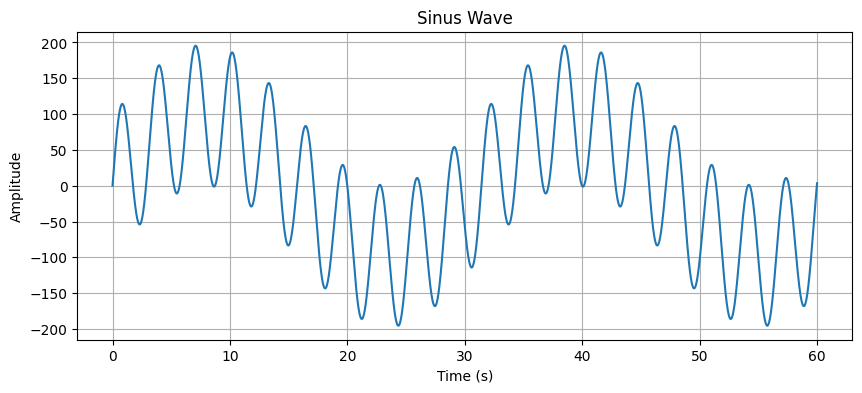

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
time_step = 0.005  # Time step in seconds

# Generate a sinus wave
time = np.arange(0, 60, time_step)  # 0 to 10 seconds, step of 0.02
amplitude = np.sin(time) * (1 + time/50) 
f = 2
divider = 0.75
amplitude = (np.sin(f*time / 10) + np.sin(f*time) + np.sin(f*time*10)) / divider
amplitude = (np.sin(f*time / 10) + np.sin(f*time)) / divider
# Save the combined signal into a CSV file
units = 100/(0.113 * 12)

# Create DataFrame
df_constant = pd.DataFrame({
    'time': time,
    'q1_l': amplitude * units,
    'q1_r': amplitude * units,  
    'q2_l': amplitude * units,
    'q2_r': amplitude * units,
})

# Save to CSV file
csv_filename = f'sinus_in_sinus_{divider}.csv'
df_constant.to_csv(csv_filename, index=False)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(time, amplitude * units)
plt.title('Sinus Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

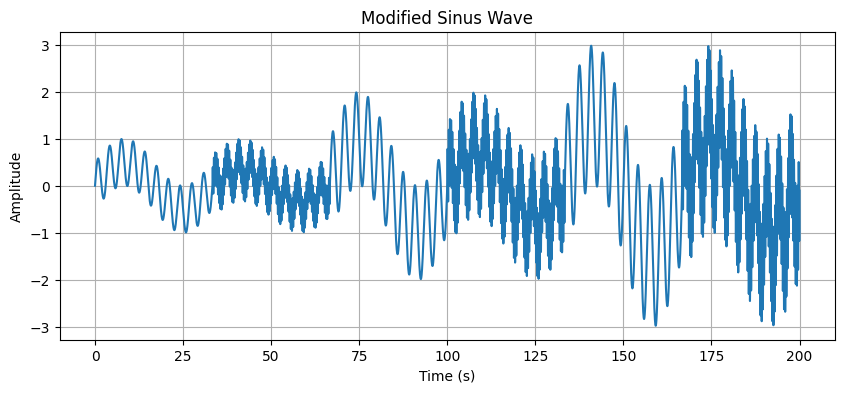

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
time_step = 0.005  # Time step in seconds
f_base = 0.03  # Base frequency for the lowest frequency sinusoid
T_base = 1 / f_base  # Period of the base frequency sinusoid
time = np.arange(0, 200, time_step)  # 0 to 60 seconds
f = 0.03
# Function to generate sinusoids according to phase within the base period
def generate_sinusoids(time, phase, amplitude):
    # Determine which set of sinusoids to sum based on the phase
    if time < T_base:
        # First quarter of the period: Sum two sinusoids with amplitude of 1V
        signal = (np.sin(2*np.pi*f*time) + np.sin(2*np.pi*f*10*time))/ 2
    elif time < T_base * 2:
        # Second quarter of the period: Sum three sinusoids with amplitude of 1V
        signal = (np.sin(2*np.pi*f*time) + np.sin(2*np.pi*f*10*time) + np.sin(2*np.pi*f*100*time)) / 3
    elif time < 3*T_base:
        # Third quarter of the period: Sum two sinusoids with amplitude of 2V
        signal = (np.sin(2*np.pi*f*time) + np.sin(2*np.pi*f*10*time)) * 2 / 2
    elif time < 4*T_base:
        # Fourth quarter of the period: Sum three sinusoids with amplitude of 2V
        signal = (np.sin(2*np.pi*f*time) + np.sin(2*np.pi*f*10*time) + np.sin(2*np.pi*f*100*time)) * 2 / 3
    elif time < 5*T_base:
        # Third quarter of the period: Sum two sinusoids with amplitude of 2V
        signal = (np.sin(2*np.pi*f*time) + np.sin(2*np.pi*f*10*time)) * 3 / 2
    else :
        # Fourth quarter of the period: Sum three sinusoids with amplitude of 2V
        signal = (np.sin(2*np.pi*f*time) + np.sin(2*np.pi*f*10*time) + np.sin(2*np.pi*f*100*time)) * 3 / 3
    return signal * amplitude

# Generating the signal
amplitude = 1  # Amplitude for the signal
signal = np.array([generate_sinusoids(t, np.mod(t, T_base), amplitude) for t in time])

units = 100/(0.113 * 12)

# Create DataFrame
df_signal = pd.DataFrame({
    'time': time,
    'q1_l': signal * units,
    'q1_r': signal * units,  
    'q2_l': signal * units,
    'q2_r': signal * units,
})

# Save to CSV file
csv_filename = 'non_trivial_ref2.csv'
df_signal.to_csv(csv_filename, index=False)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(time, signal)
plt.title('Modified Sinus Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


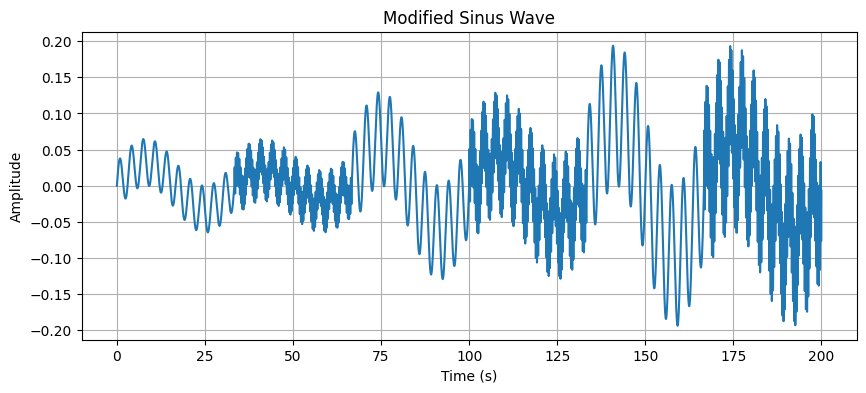

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
time_step = 0.005  # Time step in seconds
f_base = 0.03  # Base frequency for the lowest frequency sinusoid
T_base = 1 / f_base  # Period of the base frequency sinusoid
time = np.arange(0, 200, time_step)  # 0 to 60 seconds
f = 0.03
# Function to generate sinusoids according to phase within the base period
def generate_sinusoids(time, phase, amplitude):
    # Determine which set of sinusoids to sum based on the phase
    if time < T_base:
        # First quarter of the period: Sum two sinusoids with amplitude of 1V
        signal = (np.sin(2*np.pi*f*time) + np.sin(2*np.pi*f*10*time))/ 2
    elif time < T_base * 2:
        # Second quarter of the period: Sum three sinusoids with amplitude of 1V
        signal = (np.sin(2*np.pi*f*time) + np.sin(2*np.pi*f*10*time) + np.sin(2*np.pi*f*100*time)) / 3
    elif time < 3*T_base:
        # Third quarter of the period: Sum two sinusoids with amplitude of 2V
        signal = (np.sin(2*np.pi*f*time) + np.sin(2*np.pi*f*10*time)) * 2 / 2
    elif time < 4*T_base:
        # Fourth quarter of the period: Sum three sinusoids with amplitude of 2V
        signal = (np.sin(2*np.pi*f*time) + np.sin(2*np.pi*f*10*time) + np.sin(2*np.pi*f*100*time)) * 2 / 3
    elif time < 5*T_base:
        # Third quarter of the period: Sum two sinusoids with amplitude of 2V
        signal = (np.sin(2*np.pi*f*time) + np.sin(2*np.pi*f*10*time)) * 3 / 2
    else :
        # Fourth quarter of the period: Sum three sinusoids with amplitude of 2V
        signal = (np.sin(2*np.pi*f*time) + np.sin(2*np.pi*f*10*time) + np.sin(2*np.pi*f*100*time)) * 3 / 3
    return signal * amplitude

# Generating the signal
amplitude = 0.065  # Amplitude for the signal (1V for PWM, 0.65 for PWM knee, 0.065 for current)
signal = np.array([generate_sinusoids(t, np.mod(t, T_base), amplitude) for t in time])

units_pwm = 100/(0.113 * 12)
units_current = 1000/2.69
units = units_current # units_pwm, units_current
# Create DataFrame
df_signal = pd.DataFrame({
    'time': time,
    'q1_l': signal * units,
    'q1_r': signal * units,  
    'q2_l': signal * units,
    'q2_r': signal * units,
})

# Save to CSV file
csv_filename = 'non_trivial_ref_current_hip.csv'
df_signal.to_csv(csv_filename, index=False)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(time, signal)
plt.title('Modified Sinus Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [4]:
1.5* 100/(0.113 * 12)

110.61946902654867